In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from Library.sb_utils import save_file

In [2]:
pd.options.display.max_columns = 1000

In [3]:
# Import learning modules
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
# Read file
df = pd.read_csv('Data/Written_essay_scores_cleaned.csv')

In [5]:
df.head()

,Code,Content (/12),Organization (/12),Vocabulary (/12),Language Use (/12),Mechanics (/12),Total 1 (%),Total 2 (Weighted %),Country,PTJ1 (wds),SMK1 (wds),Sex,Age,Grade/Degree,Major/ Occupation,Acad. Genre,VST,CEFR,INTM,INSM,INTM+INSM,INTM-INSM,Primary,Secondary,College,Inschool,Outschool,Listening,Reading,Speaking,Writing,NS,Pronunciation,Presentation,EssayW,CEE,TOEIC,ONET,CEE_isna,ONET_isna,TOEIC_isna
0,W_CHN_001,9.5,8.0,8.0,6.5,8.0,66.65,64.55,CHN,271,219,F,20,2.0,Law,Social Sciences,30.0,B1_1,0.00,0.00,0.00,0.00,2.0,3.63,4.25,3.89,3.56,4.00,4.50,3.50,3.75,4.0,5.0,5.0,4.0,72.0,0.0,0.0,False,True,True
1,W_CHN_002,9.0,8.5,9.0,8.0,9.0,72.50,68.75,CHN,203,292,F,21,3.0,Law,Social Sciences,27.0,B1_1,4.17,4.33,8.50,-0.16,2.5,4.00,1.86,3.00,2.88,3.00,3.00,2.75,3.33,3.0,3.0,3.0,3.0,77.0,0.0,0.0,False,True,True
2,W_CHN_003,9.0,8.5,8.0,8.5,8.0,70.00,67.55,CHN,238,250,F,20,3.0,Law,Social Sciences,32.0,B1_1,5.17,5.17,10.34,0.00,3.5,4.25,4.25,4.22,4.11,5.00,4.00,3.75,4.25,4.0,5.0,5.0,5.0,79.0,0.0,0.0,False,True,True
3,W_CHN_004,8.5,9.0,7.5,8.5,9.5,71.70,66.90,CHN,269,230,F,20,2.0,Chemistry,Sciences & Technology,37.0,B1_2,4.67,5.17,9.84,-0.50,1.0,2.75,4.25,3.44,3.00,3.75,3.75,3.25,3.25,3.0,5.0,5.0,5.0,87.0,0.0,0.0,False,True,True
4,W_CHN_005,9.5,8.5,9.5,10.0,8.5,76.65,73.95,CHN,225,208,M,20,2.0,Chemistry,Sciences & Technology,44.0,B1_2,5.17,5.33,10.50,-0.16,2.0,3.63,4.88,4.33,3.67,5.00,5.00,3.25,3.75,3.0,5.0,5.0,5.0,84.0,0.0,0.0,False,True,True


In [6]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)',
       'Total 2 (Weighted %)', 'Country', 'PTJ1 (wds)', 'SMK1 (wds)', 'Sex',
       'Age', 'Grade/Degree', 'Major/ Occupation', 'Acad. Genre', 'VST',
       'CEFR', 'INTM', 'INSM', 'INTM+INSM', 'INTM-INSM', 'Primary',
       'Secondary', 'College', 'Inschool', 'Outschool', 'Listening', 'Reading',
       'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation', 'EssayW',
       'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna'],
      dtype='object')

In [7]:
# Motivations scores highly correlated and redundant. Keep just one. Weighted total is a competing target variable. Drop that one too
df = df.drop(['INTM', 'INSM', 'INTM-INSM', 'Total 2 (Weighted %)'], axis=1)

In [8]:
df.columns

Index(['Code', 'Content (/12)', 'Organization (/12)', 'Vocabulary (/12)',
       'Language Use (/12)', 'Mechanics (/12)', 'Total 1 (%)', 'Country',
       'PTJ1 (wds)', 'SMK1 (wds)', 'Sex', 'Age', 'Grade/Degree',
       'Major/ Occupation', 'Acad. Genre', 'VST', 'CEFR', 'INTM+INSM',
       'Primary', 'Secondary', 'College', 'Inschool', 'Outschool', 'Listening',
       'Reading', 'Speaking', 'Writing', 'NS', 'Pronunciation', 'Presentation',
       'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna',
       'TOEIC_isna'],
      dtype='object')

In [9]:
df.dtypes

Code                   object
Content (/12)         float64
Organization (/12)    float64
Vocabulary (/12)      float64
Language Use (/12)    float64
Mechanics (/12)       float64
Total 1 (%)           float64
Country                object
PTJ1 (wds)              int64
SMK1 (wds)              int64
Sex                    object
Age                     int64
Grade/Degree          float64
Major/ Occupation      object
Acad. Genre            object
VST                   float64
CEFR                   object
INTM+INSM             float64
Primary               float64
Secondary             float64
College               float64
Inschool              float64
Outschool             float64
Listening             float64
Reading               float64
Speaking              float64
Writing               float64
NS                    float64
Pronunciation         float64
Presentation          float64
EssayW                float64
CEE                   float64
TOEIC                 float64
ONET      

In [10]:
# Convert booleans to ints to suppress errors later
for col in ['CEE_isna', 'ONET_isna', 'TOEIC_isna']:
    df[col] = df[col].astype(int)

In [11]:
df.dtypes

Code                   object
Content (/12)         float64
Organization (/12)    float64
Vocabulary (/12)      float64
Language Use (/12)    float64
Mechanics (/12)       float64
Total 1 (%)           float64
Country                object
PTJ1 (wds)              int64
SMK1 (wds)              int64
Sex                    object
Age                     int64
Grade/Degree          float64
Major/ Occupation      object
Acad. Genre            object
VST                   float64
CEFR                   object
INTM+INSM             float64
Primary               float64
Secondary             float64
College               float64
Inschool              float64
Outschool             float64
Listening             float64
Reading               float64
Speaking              float64
Writing               float64
NS                    float64
Pronunciation         float64
Presentation          float64
EssayW                float64
CEE                   float64
TOEIC                 float64
ONET      

In [12]:
# For EDA - scatter plots of each independent variable to dependent variable
def scatterplots(columns, y_col, data, ncol=None, figsize=(15,8)) :
    if ncol == None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = y_col, data = data, alpha=0.5)
        ax.set(xlabel=col, ylabel=y_col)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [13]:
# List of dependent variable. As of yet no feature engineering with categorical columns, only numeric.
X_cols = ['PTJ1 (wds)', 'SMK1 (wds)', 'Age', 'Grade/Degree', 'VST',
       'INTM+INSM', 'Primary', 'Secondary', 'College', 'Inschool',
       'Outschool', 'Listening', 'Reading', 'Speaking', 'Writing', 'NS',
       'Pronunciation', 'Presentation', 'EssayW', 'CEE', 'TOEIC', 'ONET', 'CEE_isna', 'ONET_isna', 'TOEIC_isna']

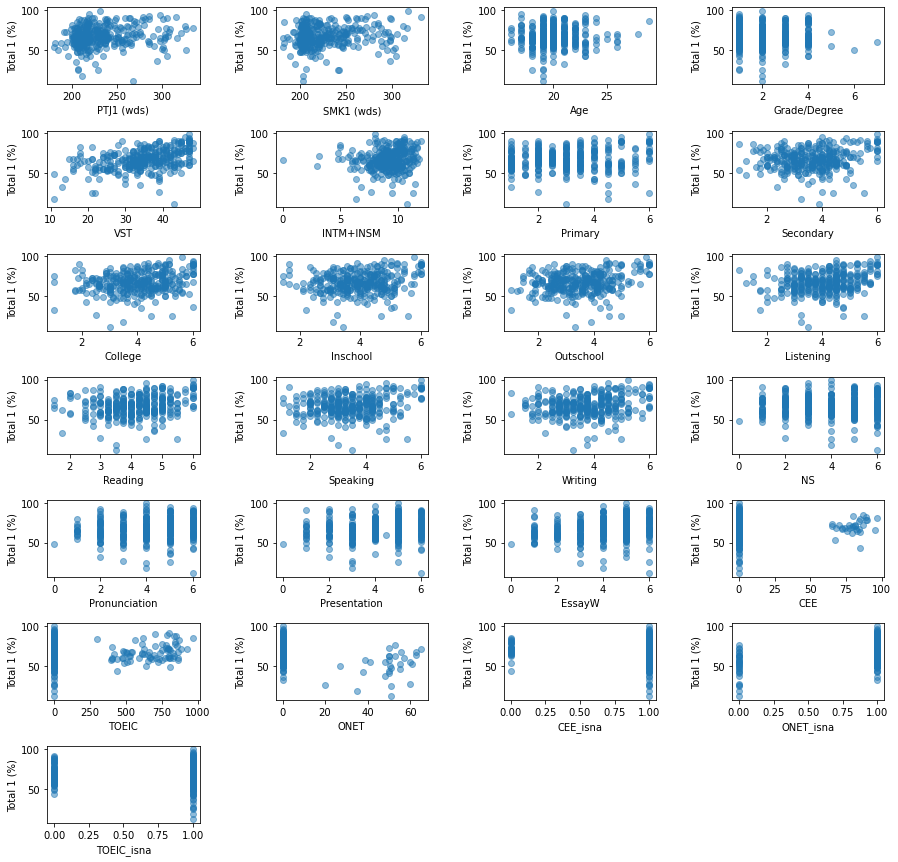

In [14]:
# EDA - plotted
scatterplots(columns = X_cols, y_col = 'Total 1 (%)', data = df, ncol=4, figsize=(15,15))

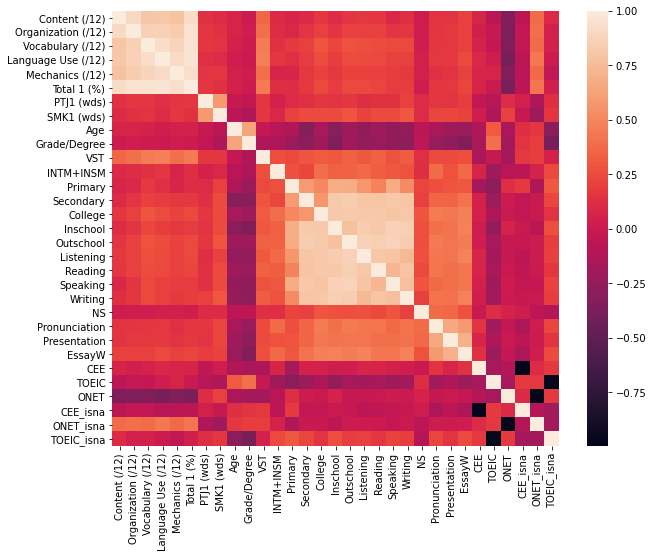

In [15]:
# Also EDA - heatmap
_ = plt.subplots(figsize=(10,8))
_ = sns.heatmap(df.corr())

In [16]:
# Subset X and y
X = df[X_cols]
y = df.loc[:, 'Total 1 (%)'].values

In [17]:
X.dtypes

PTJ1 (wds)         int64
SMK1 (wds)         int64
Age                int64
Grade/Degree     float64
VST              float64
INTM+INSM        float64
Primary          float64
Secondary        float64
College          float64
Inschool         float64
Outschool        float64
Listening        float64
Reading          float64
Speaking         float64
Writing          float64
NS               float64
Pronunciation    float64
Presentation     float64
EssayW           float64
CEE              float64
TOEIC            float64
ONET             float64
CEE_isna           int32
ONET_isna          int32
TOEIC_isna         int32
dtype: object

In [18]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
X = sm.add_constant(X)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(type(X_train), type(X_test), type(y_train), type(y_test))

(240, 25) (81, 25) (240,) (81,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [20]:
# First model - multivariate linear regression
OLSmodel = sm.OLS(y_train, X_train)
rModel = OLSmodel.fit()
rModel.params

PTJ1 (wds)         0.053240
SMK1 (wds)         0.017616
Age                0.259784
Grade/Degree       0.850254
VST                0.544139
INTM+INSM         -0.542235
Primary          -57.091948
Secondary       -136.975541
College         -134.448195
Inschool         259.190095
Outschool        258.693647
Listening        -45.029210
Reading          -47.176091
Speaking         -48.492940
Writing          -48.124400
NS                -0.315030
Pronunciation     -0.363494
Presentation       0.247797
EssayW             1.089319
CEE               -0.186528
TOEIC              0.001137
ONET               0.431796
CEE_isna         -16.757843
ONET_isna         41.126111
TOEIC_isna         2.004342
dtype: float64

In [21]:
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              372.2
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   2.65e-162
Time:                        16:21:28   Log-Likelihood:                         -899.94
No. Observations:                 240   AIC:                                      1850.
Df Residuals:                     215   BIC:                                      1937.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PTJ1 (wds)        0.0532      0.028      1.895      0.059      -0.002       0.109
SMK1 (wds)        0.0176      0.030      0.580      0.562      -0.042       0.077
Age               0.2598      0.478      0.544      0.587      -0.681       1.201
Grade/Degree      0.8503      0.946      0.899      0.370      -1.015       2.715
VST               0.5441      0.105      5.179      0.000       0.337       0.751
INTM+INSM        -0.5422      0.544     -0.997      0.320      -1.614       0.529
Primary         -57.0919     39.728     -1.437      0.152    -135.397      21.214
Secondary      -136.9755     71.995     -1.903      0.058    -278.883       4.931
College        -134.4482     71.920     -1.869      0.063    -276.207       7.310
Inschool        259.1901    178.637      1.451      0.148     -92.913     611.293
Outschool       258.6936    178.415      1.450      0.149     -92.974     610.361
Listening       -45.0292     67.342     -0.669      0.504    -177.764      87.705
Reading         -47.1761     67.445     -0.699      0.485    -180.115      85.763
Speaking        -48.4929     67.300     -0.721      0.472    -181.145      84.160
Writing         -48.1244     67.074     -0.717      0.474    -180.330      84.081
NS               -0.3150      0.514     -0.613      0.541      -1.329       0.698
Pronunciation    -0.3635      0.739     -0.492      0.624      -1.821       1.094
Presentation      0.2478      0.782      0.317      0.752      -1.294       1.790
EssayW            1.0893      0.819      1.330      0.185      -0.526       2.704
CEE              -0.1865      0.173     -1.076      0.283      -0.528       0.155
TOEIC             0.0011      0.009      0.123      0.902      -0.017       0.019
ONET              0.4318      0.197      2.196      0.029       0.044       0.819
CEE_isna        -16.7578     13.942     -1.202      0.231     -44.239      10.723
ONET_isna        41.1261      9.886      4.160      0.000      21.640      60.612
TOEIC_isna        2.0043      6.435      0.311      0.756     -10.679      14.687
==============================================================================
Omnibus:                        5.839   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.524
Skew:                          -0.334   Prob(JB):                       0.0632
Kurtosis:                       3.327   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition n

In [22]:
# Training prediction for OLS multi-linreg
y_tr_pred = rModel.predict(X_train)
y_tr_pred

88     60.020722
199    65.781813
195    74.318080
33     66.832899
167    69.212562
         ...    
244    81.708843
317    69.721527
54     70.285144
256    54.858259
23     60.567729
Length: 240, dtype: float64

In [23]:
# Test prediction for OLS multi-linreg
y_te_pred = rModel.predict(X_test)
y_te_pred

63     80.466090
160    69.301196
50     68.905464
269    45.142928
247    79.052091
         ...    
40     85.590008
207    76.609603
216    67.505645
100    72.718688
298    72.609530
Length: 81, dtype: float64

In [24]:
# For plotting performance of model versus actual
def pred_plot(y_pred, y_act, figsize=(8,6)):
    sns.set()
    fig, ax = plt.subplots(figsize=(8,6))

    ax.scatter(y_pred, y_act, color='b', label='predicted')
    ax.plot(y_act, y_act, marker='.', linestyle='-', color='r', label='perfect "model"')

    ax.set_xlabel('predicted')
    ax.set_ylabel('actual')
    ax.legend()

    plt.show()

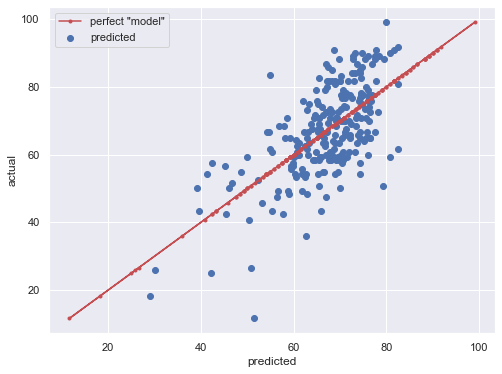

In [25]:
# Training set performance
pred_plot(y_tr_pred, y_train)

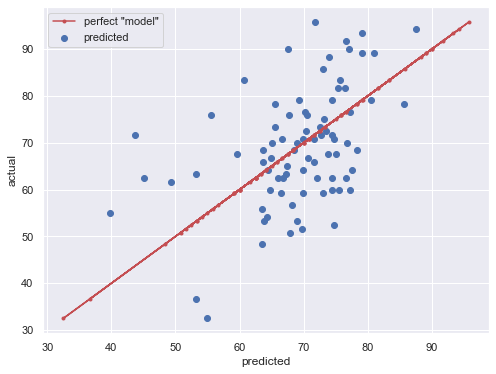

In [26]:
# Test set performance
pred_plot(y_te_pred, y_test)

In [27]:
# R^2 scores
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.4328536945621382, 0.160497456274435)

In [28]:
# Pipeline for linear regression, for selecting best number of features to feed into linreg
pipe = make_pipeline(SelectKBest(f_regression), LinearRegression())

In [29]:
# For displaying CV result statistics
def cv_score_summary(cv_results):
    cv_scores = cv_results['test_score']
    print("CV scores are: ", cv_scores)
    print("Mean and std CV scores: ", np.mean(cv_scores), np.std(cv_scores))
    print("95% confidence interval for CV scores: ", 
          np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2))

In [30]:
# 5-fold CV, cross-validation scores
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [31]:
cv_score_summary(cv_results)

CV scores are:  [0.24483052 0.08934636 0.48807482 0.21706939 0.26996441]
Mean and std CV scores:  0.2618571002117858 0.12907051154483637
95% confidence interval for CV scores:  [0.   0.52]


In [32]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [33]:
# Set up for selecting best number of variables for linreg
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [34]:
# 5-fold CV Grid Search re: number of independent variables
lr_grid_cv = GridSearchCV(pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [35]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002A148220160>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25]})

In [36]:
# Grid Search summary stats
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [37]:
# Best number of k's
lr_grid_cv.best_params_

{'selectkbest__k': 3}

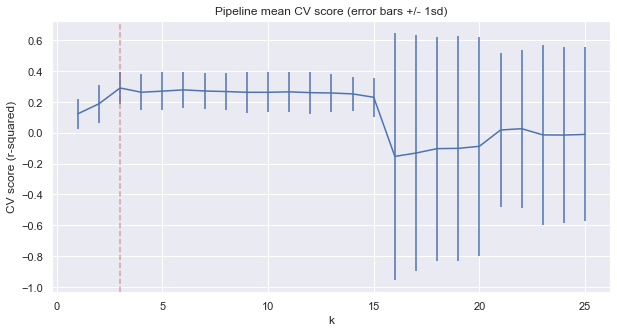

In [38]:
# Visually plotting best number of k's
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [39]:
# Optimal columns for best linreg fit: selected
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
X_train.columns[selected]

Index(['VST', 'ONET', 'ONET_isna'], dtype='object')

In [40]:
# Coefficients of regression: coefs; column names: features
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

ONET_isna    40.804879
VST           0.578082
ONET          0.443335
dtype: float64

In [41]:
# Subset training and testing sets for columns of interest
X_train_lr = X_train[features]
X_test_lr = X_test[features]

In [42]:
# Define the optimized linreg model with four features
OLSmodel_lr = sm.OLS(y_train, X_train_lr)
lr_model = OLSmodel_lr.fit()
lr_model.params

VST           0.590239
ONET          0.594206
ONET_isna    48.475767
dtype: float64

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              3007.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                   2.94e-188
Time:                        16:22:11   Log-Likelihood:                         -915.00
No. Observations:                 240   AIC:                                      1836.
Df Residuals:                     237   BIC:                                      1846.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VST            0.5902      0.089      6.623      0.000       0.415       0.766
ONET           0.5942      0.070      8.512      0.000       0.457       0.732
ONET_isna     48.4758      3.218     15.063      0.000      42.136      54.816
==============================================================================
Omnibus:                       11.353   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.791
Skew:                          -0.476   Prob(JB):                      0.00275
Kurtosis:                       3.523   Cond. No.                         162.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Predict training set
y_tr_lr_pred = lr_model.predict(X_train_lr)
y_tr_lr_pred

88     61.461017
199    68.543880
195    67.953642
33     69.134119
167    70.904835
         ...    
244    76.216982
317    67.953642
54     73.265789
256    55.090546
23     57.919585
Length: 240, dtype: float64

In [45]:
y_te_lr_pred = lr_model.predict(X_test_lr)
y_te_lr_pred

63     72.675551
160    73.856028
50     72.675551
269    51.549115
247    76.216982
         ...    
40     75.036505
207    75.626744
216    65.592687
100    73.265789
298    67.363403
Length: 81, dtype: float64

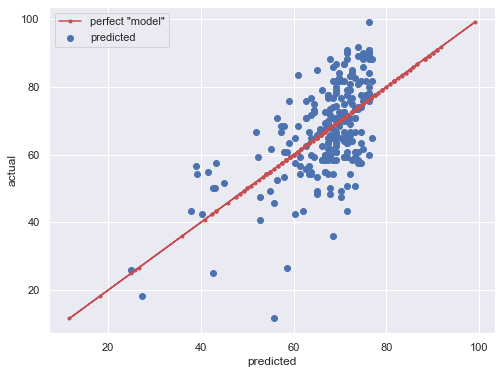

In [46]:
# Training set performance
pred_plot(y_tr_lr_pred, y_train)

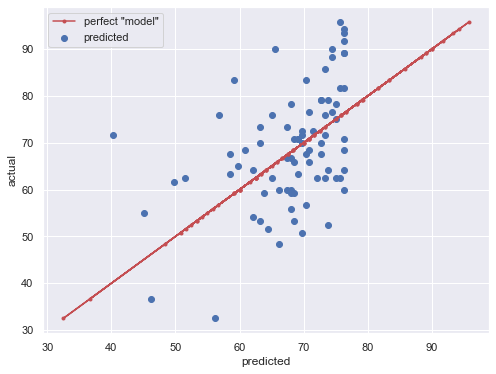

In [48]:
# Testing set performance
pred_plot(y_te_lr_pred, y_test)

In [49]:
r2_score(y_train, y_tr_lr_pred), r2_score(y_test, y_te_lr_pred)

(0.35700220750003453, 0.16842700886596318)

In [50]:
# Define two pipelines for Random Forest, one with scaler(rf_pipe_wSc), and one without (rf_pipe)
rf_pipe = make_pipeline(RandomForestRegressor())
rf_pipe_wSc = make_pipeline(StandardScaler(), RandomForestRegressor())

In [51]:
# 5-fold CV results from both pipelines
rf_default_cv_results = cross_validate(rf_pipe, X_train, y_train, cv=5)
rfs_default_cv_results = cross_validate(rf_pipe_wSc, X_train, y_train, cv=5)

In [52]:
# Show cv score statistics
print("Without scaling: ")
cv_score_summary(rf_default_cv_results)
print("\nWith scaling: ")
cv_score_summary(rfs_default_cv_results)

# With scaling is slightly better. Will progress with it.

Without scaling: 
CV scores are:  [0.32232407 0.26747353 0.41556085 0.31648555 0.27631728]
Mean and std CV scores:  0.31963225616901053 0.05256645919863657
95% confidence interval for CV scores:  [0.21 0.42]

With scaling: 
CV scores are:  [0.37649343 0.23933877 0.43388525 0.32173555 0.29025236]
Mean and std CV scores:  0.33234107145497277 0.0675189098270264
95% confidence interval for CV scores:  [0.2  0.47]


In [62]:
# Define grid number of estimators: grid_params
grid_params = { 'randomforestregressor__n_estimators': [int(n) for n in np.logspace(start=1, stop=3, num=20)],
                'standardscaler': [StandardScaler(), None] }
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [63]:
# 5-fold CV Grid Search with # of estimators
rf_grid_cv = GridSearchCV(rf_pipe_wSc, param_grid=grid_params, cv=5, n_jobs=-1)

In [64]:
# Fit with training set
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [65]:
# Best number of estimators
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 233, 'standardscaler': None}

In [66]:
# 5-fold CV with optimal number of estimators in Random Forest
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)

In [67]:
rf_best_cv_results

{'fit_time': array([0.35502601, 0.34436274, 0.35756969, 0.34706497, 0.37100697]),
 'score_time': array([0.01396275, 0.014992  , 0.01196933, 0.01296616, 0.01296568]),
 'test_score': array([0.34382217, 0.25246152, 0.40260807, 0.33442479, 0.28284144])}

In [68]:
# Summary statistics for RF model
cv_score_summary(rf_best_cv_results)

CV scores are:  [0.34382217 0.25246152 0.40260807 0.33442479 0.28284144]
Mean and std CV scores:  0.3232315991546385 0.051941607341506844
95% confidence interval for CV scores:  [0.22 0.43]


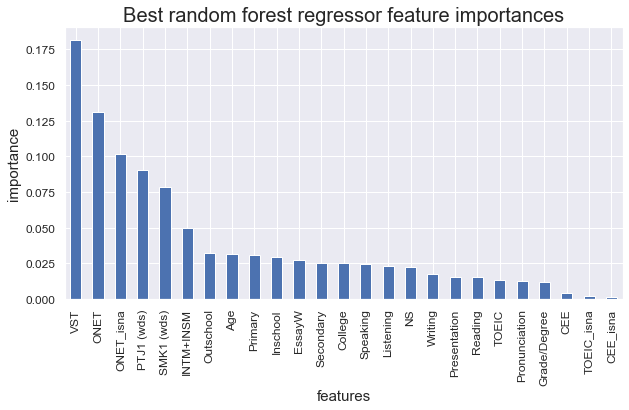

In [69]:
# Plot importance of features
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar', fontsize=12)
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.title('Best random forest regressor feature importances', fontsize=20);

In [70]:
# Predictions for training and test sets
y_tr_rf_pred = rf_grid_cv.best_estimator_.predict(X_train)
y_te_rf_pred = rf_grid_cv.best_estimator_.predict(X_test)

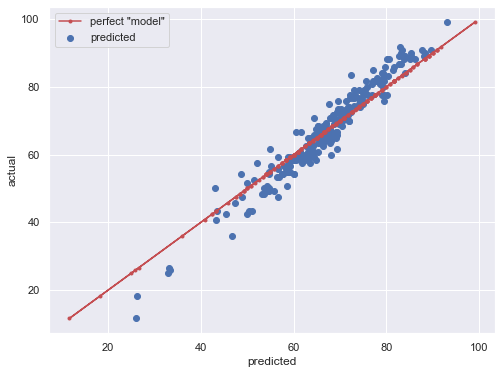

In [71]:
# Plot Training set results. Very nicely fitted - much better than linreg.
pred_plot(y_tr_rf_pred, y_train)

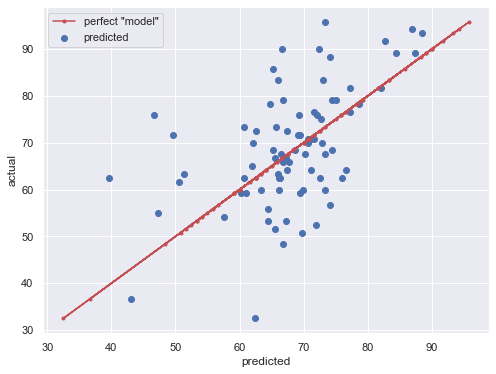

In [72]:
# Plot testing set results. Much worse performance in the testing set, not much better than linreg. 
# Very overfitted. May just need more data, or more optimization of (or fewer) parameters.
pred_plot(y_te_rf_pred, y_test)

In [74]:
print("Random Forest Model: ")
print("R^2: ", r2_score(y_test, y_te_rf_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_rf_pred)) ** 0.5)

Random Forest Model: 
R^2:  0.2265687967200818
RMSE:  10.911494658645346


In [75]:
print("Linear Regression Model (k-regression): ")
print("R^2: ", r2_score(y_test, y_te_lr_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_lr_pred)) ** 0.5)

Linear Regression Model (k-regression): 
R^2:  0.16842700886596318
RMSE:  11.314193122079315


In [76]:
print("Linear Regression Model (all variables): ")
print("R^2: ", r2_score(y_test, y_te_pred))
print("RMSE: ", (mean_squared_error(y_test, y_te_pred)) ** 0.5)

Linear Regression Model (all variables): 
R^2:  0.160497456274435
RMSE:  11.36800897994509
